#### Importimi i librarive

In [1]:
import pandas as pd
import numpy as np
#Calculate pearson correlation 
from scipy.stats import pearsonr
#Calculate spearman correlation
from scipy.stats import spearmanr

#per mi paraqit grafikisht
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

#Remove missing values.
data = data.dropna()

data = data.rename(columns={'Vleresimi(F. Kadriu)': 'Vlerësuesi: Fatbardh Kadriu', 'Vleresimi(F. Gashi)': 'Vlerësuesi: Fatbardh Gashi', 'Vleresimi(A. Musa)': 'Vlerësuesi: Arbena Musa'})
data.drop(['Id', 'Emri i komentuesit', 'Comment timestamp', 'Post timestamp', 'Like', 'URL'], axis='columns', inplace=True)

In [3]:
# Shfaqja e rreshtave prej 130 deri 134 
data.head(n=134)[130:]

#Shfaqja e 5 rreshtave te fundit
#data.tail()

,Komenti,Vlerësuesi: Fatbardh Kadriu,Vlerësuesi: Fatbardh Gashi,Vlerësuesi: Arbena Musa
130,Kjamet,2.0,2.0,2.0
131,So keq sa per fillim,1.0,1.0,1.0
132,Gilanin mdoket pe harroni kejt,0.0,0.0,2.0
133,Ni pytje per juve a jeni ne dijeni qe personat...,2.0,2.0,2.0


In [4]:
data = data.rename(columns={'Vlerësuesi: Fatbardh Kadriu': 'Vlerësuesi 1', 'Vlerësuesi: Fatbardh Gashi': 'Vlerësuesi 2', 'Vlerësuesi: Arbena Musa': 'Vlerësuesi 3'})
vleresimet = data[['Vlerësuesi 1', 'Vlerësuesi 2', 'Vlerësuesi 3']]

data.shape # Kthen liste te tipit (numri i rreshtave, numri i kolonave)

(1435, 4)

In [5]:
#Vleresimi 1
print("Vlerësuesi: Fatbardh Kadriuor")
print("Vleresime pozitive:", (data['Vlerësuesi 1'] == 1).sum())
print("Vleresime negative:", (data['Vlerësuesi 1'] == 2).sum())
print("Vleresime neutrale:", (data['Vlerësuesi 1'] == 0).sum())

Vlerësuesi: Fatbardh Kadriuor
Vleresime pozitive: 276
Vleresime negative: 536
Vleresime neutrale: 623


Text(0.5, 1.0, 'Fatbardh Kadriu')

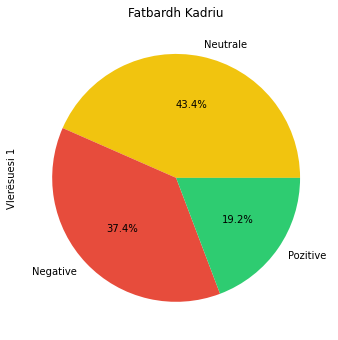

In [6]:
data['Vlerësuesi 1'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5.7,5.7),
                                                     labels=['Neutrale', 'Negative', 'Pozitive'],
                                                    colors = ( "#F1C40F", "#E74C3C", "#2ECC71"))
plt.title('Fatbardh Kadriu')

In [7]:
#Vleresimi 2
print("Vlerësuesi: Fatbardh Gashi")
print("Vleresime pozitive:", (data['Vlerësuesi 2'] == 1).sum())
print("Vleresime negative:", (data['Vlerësuesi 2'] == 2).sum())
print("Vleresime neutrale:", (data['Vlerësuesi 2'] == 0).sum())

Vlerësuesi: Fatbardh Gashi
Vleresime pozitive: 133
Vleresime negative: 397
Vleresime neutrale: 905


Text(0.5, 1.0, 'Fatbardh Gashi')

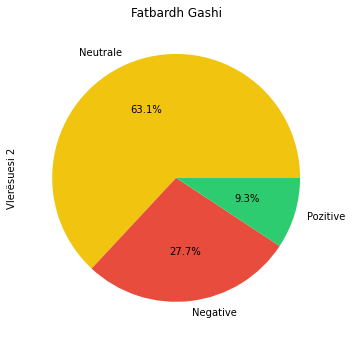

In [8]:
data['Vlerësuesi 2'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5.7,5.7),
                                                     labels=['Neutrale', 'Negative', 'Pozitive'],
                                                    colors = ( "#F1C40F", "#E74C3C", "#2ECC71"))
plt.title('Fatbardh Gashi')

In [9]:
#Vleresimi 3
print("Vlerësuesi: Arbena Musa")
print("Vleresime pozitive:", (data['Vlerësuesi 3'] == 1).sum())
print("Vleresime negative:", (data['Vlerësuesi 3'] == 2).sum())
print("Vleresime neutrale:", (data['Vlerësuesi 3'] == 0).sum())

Vlerësuesi: Arbena Musa
Vleresime pozitive: 185
Vleresime negative: 715
Vleresime neutrale: 535


Text(0.5, 1.0, 'Arbena Musa')

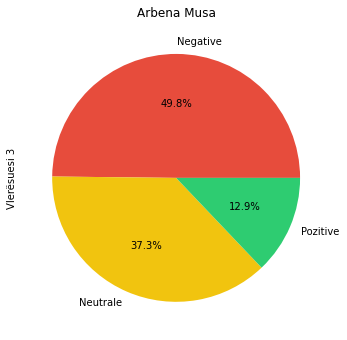

In [10]:
data['Vlerësuesi 3'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5.7,5.7),
                                                     labels=['Negative', 'Neutrale', 'Pozitive'],
                                                    colors = ( "#E74C3C", "#F1C40F", "#2ECC71"))
plt.title("Arbena Musa")

In [11]:
print("Vlerësime të njëjta Vlerësuesi 1 me Vlerësuesin 2 ->",
     (data['Vlerësuesi 1'] == data['Vlerësuesi 2']).sum(),
      "nga",
      data.shape[0])

print("Vlerësime të njëjta Vlerësuesi 1 me Vlerësuesin 3 ->",
     (data['Vlerësuesi 1'] == data['Vlerësuesi 3']).sum(),
      "nga",
      data.shape[0])

print("Vlerësime të njejtë Vlerësuesi 2 me Vlerësuesin 3 ->", 
      (data['Vlerësuesi 2'] == data['Vlerësuesi 3']).sum(), 
      "nga", 
      data.shape[0])

Vlerësime të njëjta Vlerësuesi 1 me Vlerësuesin 2 -> 1028 nga 1435
Vlerësime të njëjta Vlerësuesi 1 me Vlerësuesin 3 -> 937 nga 1435
Vlerësime të njejtë Vlerësuesi 2 me Vlerësuesin 3 -> 914 nga 1435


# Pearson's Correlation

### Vlerësuesi 1 vs 2

In [12]:
corr, _ = pearsonr(data['Vlerësuesi 1'],
                   data['Vlerësuesi 2'])
print("Pearson's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 2 është ", corr)

Pearson's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 2 është  0.5327671537760319


### Vlerësuesi 1 vs 3

In [13]:
corr1, _ = pearsonr(data['Vlerësuesi 1'],
                   data['Vlerësuesi 3'])
print("Pearson's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 3 është ", corr1)

Pearson's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 3 është  0.4175727496008779


### Vlerësuesi 2 vs 3

In [14]:
corr2, _ = pearsonr(data['Vlerësuesi 2'],
                   data['Vlerësuesi 3'])
print("Pearson's corroleation në mes Vlerësuesit 2 dhe Vlerësuesit 3 është ", corr2)

Pearson's corroleation në mes Vlerësuesit 2 dhe Vlerësuesit 3 është  0.4198326017650549


# Spearman's Correlation

### Vlerësuesi 1 vs 2

In [15]:
corr3, _ = spearmanr(data['Vlerësuesi 1'],
                     data['Vlerësuesi 2'])
print("Spearman's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 2 është ", corr3)

Spearman's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 2 është  0.5241949370279608


### Vlerësuesi 1 vs 3

In [16]:
corr4, _ = spearmanr(data['Vlerësuesi 1'],
                     data['Vlerësuesi 3'])
print("Spearman's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 3 është ", corr4)

Spearman's corroleation në mes Vlerësuesit 1 dhe Vlerësuesit 3 është  0.41167560073069104


### Vlerësuesi 2 vs 3

In [17]:
corr5, _ = spearmanr(data['Vlerësuesi 2'],
                     data['Vlerësuesi 3'])
print("Spearman's corroleation në mes Vlerësuesit 2 dhe Vlerësuesit 3 është ", corr5)

Spearman's corroleation në mes Vlerësuesit 2 dhe Vlerësuesit 3 është  0.4002331868812734


In [18]:
vleresimet.corr()

,Vlerësuesi 1,Vlerësuesi 2,Vlerësuesi 3
Vlerësuesi 1,1.000000,0.532767,0.417573
Vlerësuesi 2,0.532767,1.000000,0.419833
Vlerësuesi 3,0.417573,0.419833,1.000000


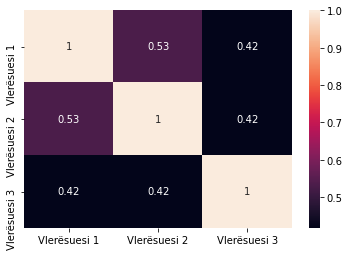

In [19]:
# plt.matshow(vleresimet.corr())
# plt.xticks(range(len(vleresimet.columns)), vleresimet.columns)
# plt.yticks(range(len(vleresimet.columns)), vleresimet.columns)
# plt.colorbar()
# plt.show()
corrMatrix = vleresimet.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Nxjerrja e vleresimit final nga 3 vleresimet

In [20]:
# I kthejme ne array vlerat e te tri kolonave
x = data['Vlerësuesi 1'].values # type(x) -> <class 'numpy.ndarray'>
y = data['Vlerësuesi 2'].values  # type(y) -> <class 'numpy.ndarray'>
z = data['Vlerësuesi 3'].values   # type(z) -> <class 'numpy.ndarray'>

newValues = [] # type(newValues) -> <class 'list'>
for i in range(0, len(x)):
    if(x[i] == y[i] or x[i] == z[i]):
        newValues.append(x[i])
    elif(y[i] == x[i] or y[i] == z[i]):
        newValues.append(y[i])
    elif(z[i] == x[i] or z[i] == y[i]):
        newValues.append(z[i])
    else:
        newValues.append(0)

data['Sentimenti'] = newValues
data.to_csv("trainset.csv", index=False)

## Dataseti me vleresimin final 

In [21]:
trainset = pd.read_csv("trainset.csv")
trainset.drop([#'Id', 'Emri i komentuesit', 'Like', 
               #'Comment timestamp', 'Post timestamp', 
               #'URL',
              'Vlerësuesi 1', 
              'Vlerësuesi 2', 
              'Vlerësuesi 3'], axis='columns', inplace=True)

In [22]:
trainset.head(n=134)[130:]

,Komenti,Sentimenti
130,Kjamet,2.0
131,So keq sa per fillim,1.0
132,Gilanin mdoket pe harroni kejt,0.0
133,Ni pytje per juve a jeni ne dijeni qe personat...,2.0


In [23]:
#Sentimenti
print("Sentimenti (Vlerësimi final): ")
print("Vlerësime pozitive:", (trainset['Sentimenti'] == 1).sum())
print("Vlerësime negative:", (trainset['Sentimenti'] == 2).sum())
print("Vlerësime neutrale:", (trainset['Sentimenti'] == 0).sum())
print("Vlerësime totale:", (trainset['Sentimenti']).count())

Sentimenti (Vlerësimi final): 
Vlerësime pozitive: 177
Vlerësime negative: 522
Vlerësime neutrale: 736
Vlerësime totale: 1435


Text(0.5, 1.0, 'Sentimenti')

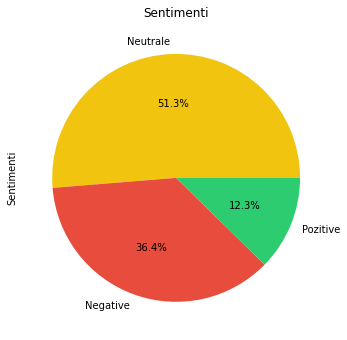

In [24]:
trainset['Sentimenti'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5.7,5.7),
                                                     labels=['Neutrale', 'Negative', 'Pozitive'],
                                                    colors = ( "#F1C40F", "#E74C3C", "#2ECC71"))
plt.title('Sentimenti')

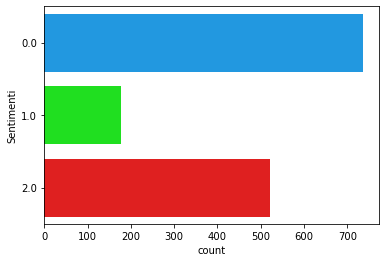

In [25]:
import seaborn as sns

sns.countplot(y='Sentimenti', data=trainset, palette=['#03A0FF', '#00FF00', '#FF0000'])

In [26]:
trainset.shape

(1435, 2)